<h1><center>Laboratorio 4: El Pandas no muerde (act. I) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Alan Contreras Montanares


### **Link de repositorio de GitHub:** `https://github.com/AlanMontanares/MDS7202`

### Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **Ausentes tienen nota máxima 6.0**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas` para manejar datos tabulares.
- Aprender a utilizar la documentación de pandas (y en general, de cualquier librería de python) como también a buscar soluciones en la web.

> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

### Librerias utiles para el Lab 😸

In [1]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
from IPython.display import display

#Libreria para plotear
import plotly.express as px
import matplotlib.pyplot as plt

# Librerias utiles
from sklearn.preprocessing import StandardScaler

# 1. Rendimiento en Estudiantes 📚

Para este laboratorio deberán trabajar con el dataset `students_grades.json` el cual contiene información sobre el rendimiento de alumnos en distintos ramos. 
El objetivo principal será el de realizar un trabajo de limpieza de prepración y exploración de datos utilizando exclusivamente `DataFrames` y sus métodos asociados. 




In [5]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1.1 Carga e Inspección de Datos [1.5 Puntos]


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>


*Don Caguayo*, rector de la Universidad de la Cachaña, les comenta que actualmente la Universidad no tiene una subdirección de análisis de datos, pero que tiene un gran interés en formar una. Es por esto, que se contacta con ud. y su equipo para iniciar de forma exploratoria diversas tareas de análisis y consolidación de datos respectivos al rendimiento de sus alumnos.

Previo a su primera reunión con el rector, el rector le envía una copia de la base de datos, la cuál a usted y su equipo le encantaría examinar. Para esto, la primera tarea que debe realizar es abrir y cargar el dataset. 


> **Notar que es sumamente importante el formato que posee cada columna** para su manipulación y que posiblemente ustedes deberán especificar algunos tipos de datos a mano. Ver la documentación del método `read_json` para mayor información.

A continuación se muestra un ejemplo de los dos primeros registros del dataset:

```json
[
  {
    "names": "Rita Courtney",
    "gender": "female",
    "race/ethnicity": "group B",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 37,
    "reading score": 46,
    "writing score": 46
  },
  {
    "names": "Madeline Fuller",
    "gender": "female",
    "race/ethnicity": "group C",
    "parental level of education": "some high school",
    "lunch": "standard",
    "test preparation course": "none",
    "math score": 124,
    "reading score": 142,
    "writing score": 142
  }
]
```





In [2]:
df_grades = pd.read_json("students_grades.json")

In [3]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166
...,...,...,...,...,...,...,...,...,...
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193,142,193
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66,74,81
1397,Laurie Carter,female,group B,some high school,standard,completed,54,61,62
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193,196,193



<p align="center">
  <img src="https://i.giphy.com/media/4FQMuOKR6zQRO/giphy.webp">
</p>


Posteriormente, el rector les comenta que la sección de TI posee una base de datos con más de **875** filas, en donde cada fila representa un alumno matriculado. Sin embargo, cree fuertemente que existen errores en esta: solo tiene registro de **875** matriculas. Por este motivo, especula que se han realizado malas prácticas al registrar dichos datos.

En consecuencia, el rector les solicita a ustedes como tarea inicial que exploren la base de datos y encuentre posibles falencias dentro de sus registros. Para esto, usted debe estar al tanto que las notas están en una escala que van del **0 al 100** (porcentaje de logro) y **no es posible que un alumno haya dado más de una vez el mismo examen**. Cualquier alumno que posea un valor diferente a esta escala, debería ser eliminado de la base de datos.


> **Instrucciones**

**Cree una función** que tome un `DataFrame` y que le permita revisar si las diferentes variables que lo componen son coherentes y si es posible observar anomalías en estas. 

**To-Do**
1. [ ] Imprimir un mensaje con las dimensiones del Dataframe.
2. [ ] Imprimir un mensaje con los nombres de las columnas que conforman el DataFrame.
3. [ ] Mostrar los primeros 5, los últimos 5 elementos del DataFrame y realice un muestreo de 5 elementos de forma aleatoria.
4. [ ] Mostrar una descripción rápida de las variables numéricas del DataFrame (utilice un método visto en clases).
5. [ ] Imprimir un mensaje con la cantidad de valores nulos (investigue el método `isna()` y `sum()` de los DataFrames).
6. [ ] Imprimir un mensaje que detalle la cantidad de valores unicos (investigue `nunique()`) .
7. [ ] Imprimir un mensaje con el total de filas que contengan nombres duplicados (investigue `duplicated()` y su parámetro `subset`).
8. [ ] Mostrar las filas que contengan nombres sean duplicados (investigue `duplicated()` y su parámetro `subset`).
9. [ ] A traves de `.plot.box()` plotear el boxplot de las notas. De ser necesario, invetigue como funcionan los gráficos de caja (esta sección es provista).
10. [ ] Finalmente responda la siguiente pregunta:

> ¿Que anomalias es posible observar de los datos que componen el DataFrame? ¿Existen valores nulos o duplicados? ¿Qué puede interpretar de la distribución de las notas en el boxplot? (), comente esto en la celda ubicada debajo de **justificación**.

> **Nota:** Para imprmir utilice `print(...)`. Para mostrar `DataFrames`, utilice `display(...)` ya que este permite mostrar estos elementos como tablas.

> **Nota 2:** Utilice la documentación de [pandas](https://pandas.pydata.org/docs/index.html) como también StackOverflow para resolver cualquier problema o inconveniente.

> **Nota 3:** Si no ha trabajado con boxplot antes, el siguiente link puede serle de mucha ayuda: [boxplot](https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c) 

**Respuesta:**

In [4]:
def exploratory_data_analysis(dataframe):
    # 1.
    print(f"1.- El Dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas\n")

    # 2.
    print(f"2.- El DataFrame esta compuesto por las siguientes columnas: {df_grades.columns.tolist()}\n")

    # 3.
    print(f"3.- Ejemplos de filas del DataFrame:")
    print("\nPrimeras 5 filas:")
    display(dataframe.head())
    print("\nÚltimas 5 filas:")
    display(dataframe.tail())
    print("\nMuestreo aleatorio de 5 filas:")
    display(dataframe.sample(5))

    # 4.
    print("4.- Descripción numérica del Dataframe:")
    display(dataframe.describe())

    # 5. 
    print(f"5.- Cantidad de valores nulos por columna:\n ")
    dataframe = dataframe.replace("", np.nan) # Reemplazamos valores "" a nulos
    print(f"{dataframe.isna().sum()}\n")

    # 6. 
    print("6.- Cantidad de valores únicos por columna:\n")
    print(f"{dataframe.nunique()}\n")

    # 7.
    print(f"7.- Presenta un total de {dataframe.duplicated('names', keep='first').sum()} filas con nombres duplicados.\n")

    # 8.
    print("8.- Las filas con nombres duplicados son:")
    display(dataframe[dataframe.duplicated(subset='names', keep='first')])

    # 9. 
    plt.figure(figsize=(12, 6))  
    plt.boxplot([dataframe['math score'].dropna(), dataframe['reading score'].dropna(), dataframe['writing score'].dropna()])
    plt.title('Boxplot de Notas')
    plt.ylabel('Valor')
    plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'])  
    plt.show()


1.- El Dataframe tiene 1400 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37,46,46
1,Madeline Fuller,female,group C,some high school,standard,none,124,142,142
2,Daniel Rester,male,group E,associate's degree,standard,none,156,196,193
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80,78,81
4,Geraldine Hale,female,group A,associate's degree,standard,none,131,166,166



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193,142,193
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66,74,81
1397,Laurie Carter,female,group B,some high school,standard,completed,54,61,62
1398,Joseph Mccoy,male,group D,some college,free/reduced,none,193,196,193
1399,Amanda Perez,female,group A,high school,standard,completed,68,80,76



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1082,Brian Langston,male,group C,high school,free/reduced,none,59,53,52
1060,Zachary Glenn,male,group E,some college,standard,completed,188,124,142
1078,Louis Christopher,male,group A,high school,free/reduced,completed,72,67,65
395,Jeane Budds,female,group D,some college,standard,none,193,,156
1013,Franklin Hawkins,male,group D,some college,standard,none,79,73,67


4.- Descripción numérica del Dataframe:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1400,1400,1400,1400,1400,1400,1400,1400,1400
unique,1153,2,5,6,2,2,97,89,93
top,Robert Frazier,female,group C,some college,standard,none,193,193,193
freq,3,723,452,334,904,898,120,117,133


5.- Cantidad de valores nulos por columna:
 
names                           0
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     40
reading score                  40
writing score                  47
dtype: int64

6.- Cantidad de valores únicos por columna:

names                          1153
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       96
reading score                    88
writing score                    92
dtype: int64

7.- Presenta un total de 247 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
12,Rita Courtney,female,group B,some high school,standard,none,193.0,193.0,193.0
81,Elizabeth Quintero,female,group B,some college,standard,none,82.0,85.0,87.0
160,Michelle Gonzales,female,group B,some high school,standard,completed,60.0,70.0,74.0
170,Carla Mendoza,female,group D,associate's degree,free/reduced,none,43.0,60.0,58.0
176,Darlene Parker,female,group C,associate's degree,standard,none,54.0,61.0,58.0
...,...,...,...,...,...,...,...,...,...
1385,James Crawford,male,group D,master's degree,standard,none,193.0,147.0,131.0
1390,Gloria Bradford,female,group B,high school,standard,none,124.0,64.0,193.0
1393,Adam Romero,male,group C,high school,standard,completed,124.0,193.0,49.0
1395,Alexander Dillon,male,group D,associate's degree,standard,none,193.0,142.0,193.0


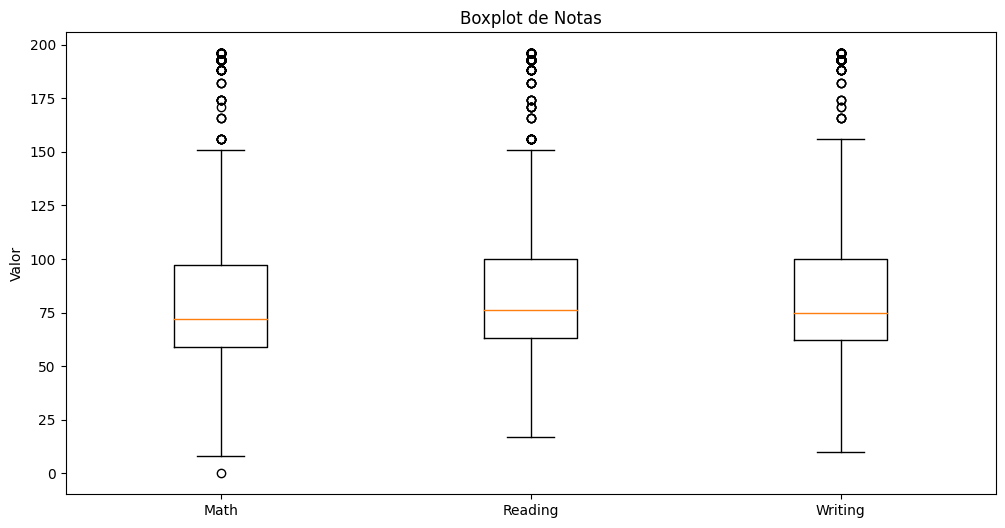

In [5]:
exploratory_data_analysis(df_grades)

**Justificación:**

```
Las anomalias detectadas son varias, por ejemplo que existen nombres duplicados, esto quiere decir que existen alumnos que dieron examenes más de una vez, y por enunciado esto no debiese suceder. Otras anomalias son los valores de examenes mayores a 100 puntos, y por enunciado esto tampoco debiese ocurrir, ya que las notas van de 0 a 100 puntos.

Por otro lado, existen valores nulos, estos se encontraban de la forma "" (como tipo str), para poder hacer el boxplot se transformaron a valores nulos y luego se eliminaron (sin modificar el dataframe original).

Respecto a los boxplot, se puede ver la presencia de outliers, principalmente con alto valor de puntaje, esto se debe a que la distribucion se concentra particularmente en puntajes menores cercanos a los 75 puntos. Adicionalmente el programa calcula estos outlier como aquellos que estan sobre el valor del tercer cuartil más 1.5 veces la diferencia entre el cuartil tercero con el primero (Q3 + 1.5(Q3-Q1)), y cualquier valor superior a este umbral se considera outlier, lo cual tiene sentido ya que hay valores muy por encima de este umbral. El caso analogo es para el umbral inferior en el cual solo hay 1 outlier para el examen de matematicas. Asi tambien se puede ver que la mediana se encuentra aproximadamente en 75 puntos para todas las pruebas, y que la distribucion no es simetrica (no es una distribucion normal), por lo que las notas estan sesgadas.
```

## 1.2 Limpieza de Datos [1 punto]

<p align="center">
  <img src="https://blogdatlas.files.wordpress.com/2020/07/datlas_mx_blog_limpieza_bds_data-scrubbing-service.gif">
</p>


En base a lo realizado anteriormente, realice una limpieza de los dataset. Asuma los supuestos señalados en la pregunta anterior para limpiar el `DataFrame` y cree una función que le permita limpiar los datos. Habiendo limpiado el `DataFrame`, compruebe nuevamente los datos con la función creada en la sección 1.1.

**To-Do:**

- [ ] Crear función que permita limpiar el dataset.
- [ ] Comprobar que no existen anomalías en los datos a traves de la función de la sección 1.1.

**Hint**

Puede ser útil los métodos ```.drop_duplicates()``` y ```.dropna()``` como también utilizar queries con máscaras booleanas.


**Respuesta:**

In [6]:
def clean_data(df):
    
    df_copy = df.copy()
    df_copy = df_copy.replace("", np.nan) #Reemplazamos los "" por nan

    # Eliminamos filas con valores nulos
    mask =(
        (df_copy["math score"].isna()) | 
        (df_copy["reading score"].isna()) |
        (df_copy["writing score"].isna()) 
    )

    df_copy = df_copy[~mask]

    # Eliminamos filas con notas menores a 0 o mayores a 100
    mask = (
        (df_copy["math score"] > 100) | (df_copy["math score"] < 0) |
        (df_copy["reading score"] > 100) | (df_copy["reading score"] < 0) |
        (df_copy["writing score"] > 100) | (df_copy["writing score"] < 0)
    )

    df_copy = df_copy[~mask]


    # Eliminamos duplicados
    df_copy = df_copy[~df_copy.duplicated('names', keep='first')]
    
    return df_copy  

In [7]:
clean_df = clean_data(df_grades)
clean_df

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0


> Utilice la función creada en el punto 1.1 para verificar sus resultados.

1.- El Dataframe tiene 1000 filas y 9 columnas

2.- El DataFrame esta compuesto por las siguientes columnas: ['names', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

3.- Ejemplos de filas del DataFrame:

Primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,37.0,46.0,46.0
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,80.0,78.0,81.0
5,Brian Young,male,group C,some high school,standard,none,73.0,66.0,63.0
6,Howard Jimenez,male,group E,some high school,standard,completed,81.0,75.0,76.0
7,Wayne Wilson,male,group B,some high school,standard,completed,94.0,86.0,87.0



Últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1392,Richard Young,male,group D,high school,standard,none,69.0,75.0,71.0
1394,Wanda Russell,female,group B,high school,free/reduced,completed,23.0,44.0,36.0
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,66.0,74.0,81.0
1397,Laurie Carter,female,group B,some high school,standard,completed,54.0,61.0,62.0
1399,Amanda Perez,female,group A,high school,standard,completed,68.0,80.0,76.0



Muestreo aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
826,Rachel Breland,female,group B,high school,free/reduced,completed,76.0,85.0,82.0
1191,Diane Olson,female,group C,some college,standard,completed,69.0,90.0,88.0
867,Maria Caballero,female,group C,high school,standard,completed,60.0,64.0,74.0
1122,Deborah Clark,female,group B,some high school,free/reduced,completed,63.0,78.0,79.0
280,Michael Young,male,group B,associate's degree,free/reduced,none,61.0,58.0,56.0


4.- Descripción numérica del Dataframe:


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


5.- Cantidad de valores nulos por columna:
 
names                          0
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

6.- Cantidad de valores únicos por columna:

names                          1000
gender                            2
race/ethnicity                    5
parental level of education       6
lunch                             2
test preparation course           2
math score                       81
reading score                    72
writing score                    77
dtype: int64

7.- Presenta un total de 0 filas con nombres duplicados.

8.- Las filas con nombres duplicados son:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


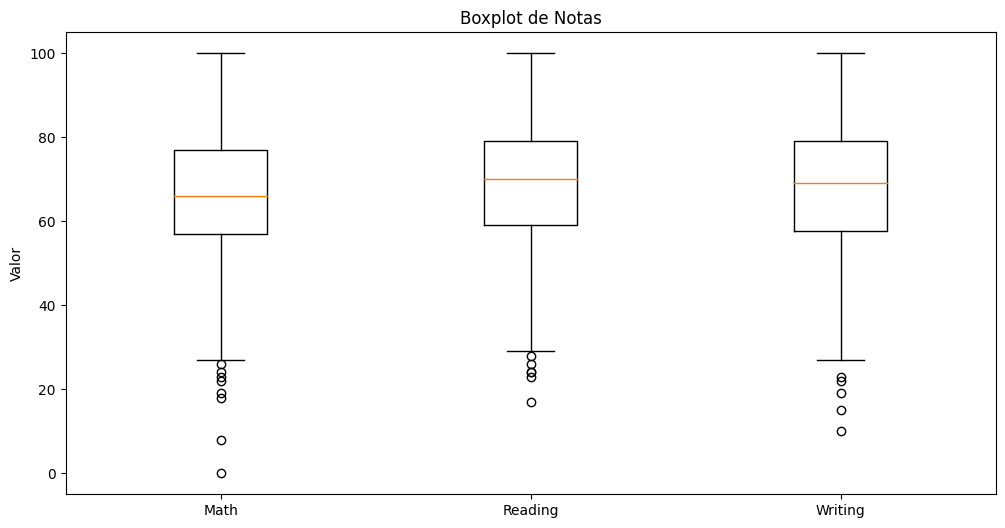

In [8]:
exploratory_data_analysis(clean_df)

**Justificación:**

```
Las anomalias corresponden a los valores que estan por debajo de los bigotes inferiores de cada caja, esto es porque estan demasiado lejos de la distribucion de la muestra.

Ahora bien, algo a tomar en cuenta es la forma en la que se eliminan anomalias. Primero se pudieron eliminar valores duplicados y luego los que estaban fuera de los margenes de puntajes o al reves. Si bien ambas entregan distintos resultados, hay una forma que es mas correcta que la otra.

Por ejemplo, imaginese que el nombre "pepe" esta repetido 2 veces, y los valores se fueron registrando en orden temporal (eg. loc=1 se registro primero que loc=2). ¿Qué hubiese pasado si en el primer registro hubiese obtenido 150 puntos en un examen?, en ese caso se deberian eliminar los dos registros, debido a que el segundo no cuenta porque no se vale hacer un examen por más de una vez, y el primero se eliminaria por exceder los limites de los umbrales. En caso de que el primer registro no exceda los margenes de puntaje se conservaria solo ese registro.

Dicho esto, lo mas adecuado seria primero eliminar los valores duplicados (ya que solo debemos conservar los primeros registros de cada uno) y luego eliminar las filas que excedan los margenes de puntajes, debido a que si lo hacemos al reves, podriamos estar dejando los resultados del segundo examen (lo cual tampoco se debe). Sin embargo, esto solo contaria si el supuesto de que los registros fueron hechos en orden temporal. Como en este caso no se especifica se podria tomar cualquier orden debido a que no hay mas informacion previa. Sin embargo, en este caso se pidio explicitamente que se dejaran las 1000 muestras, por lo que primero se eliminaron valores nan, luego los que exceden los rangos y por ultimo los duplicados.

Respecto a estos nuevos boxplot se puede ver mayor presencia de outliers por abajo, la mediana se encuentra entre 70 y 75 puntos para todos los examenes, y las distribuciones siguen teniendo un comportamiento un poco asimetrico.
```

## 1.3 Trabajando con Datos

<p align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif">
</p>

### 1.3.1 Transformación de notas a "Nota Chilena" [0.5 Puntos]

En una de las reuniones con Don Caguayo este les comenta su intención de pasar todas sus notas a la "Escala Chilena". Para esto les facilita la siguiente ecuación:

$$Nota \, Chilena= \% \, de \, logro*0.06 + 1$$

Utilizando la ecuación entregada, cree una función que le permita pasar a la escala Chilena las notas del dataframe y entregue las notas redondeadas al segundo decimal.

**To-Do**

- [ ] Tranforme los valores a la escala chilena.

**Respuesta:**

In [9]:
def nota_chilena(dataframe_in, columna):
  dataframe_in_copy = dataframe_in.copy()
  dataframe_in_copy[columna] = round(dataframe_in_copy[columna]*0.06 +1, 2)
  
  return dataframe_in_copy

In [10]:
clean_df_scale = nota_chilena(clean_df, "math score")
clean_df_scale = nota_chilena(clean_df_scale, "reading score")
clean_df_scale = nota_chilena(clean_df_scale, "writing score")
clean_df_scale

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


### 1.3.2 Obtención de promedio de alumnos [0.5]

Con todas las notas adjuntadas, la prestigiosa Universidad De la Cachaña necesita obtener el promedio general de cada uno de los alumnos. Para esto se le solicita que calcule el promedio con cada una de las asignaturas y el promedio se anexe como una nueva columna al final del `DataFrame` original. Cabe señalar que las notas deben ser redondeadas al segundo decimal.

**To-Do:**
- [ ] Crear función que nos permite obtener el promedio de cada uno de los alumnos y anexar esta información en el `DataFrame` original.


**Respuesta:**

In [11]:
def alumnos_promedio(dataframe_in):
  dataframe_in_copy = dataframe_in.copy()
  dataframe_in_copy["GPA"] = round(dataframe_in[["math score","reading score","writing score"]].mean(axis=1),2)
  return dataframe_in_copy

**Respuesta Esperada:**

In [41]:
clean_df_scale2 = alumnos_promedio(clean_df_scale)
clean_df_scale2.head()

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34


### 1.3.3 Reprobados y Destacados [1.5 Punto, 0.5 Cada DataFrame]

Contentos con su desempeño, la Universidad les solicita que obtengan los alumnos quienes han reprobado el año y los que han tenido desempeño de destacado. Para esto se considerará que un alumno ha reprobado el año cuando el promedio de notas es inferior a 4.0 en la Escala Chilena, y se considerará destacado si posee notas superiores a 5.8 en todas las asignaturas (o sea notas superiores a 5.8 en `math score`, `reading score` y `writing score`).

Cree una función que permita obtener tres Dataframes: 
- El primero deberá poseer solamente los alumnos que han reprobado en la prestigiosa universidad.
- El segundo debe entregar un DataFrame similar al original, pero marcado con una "R" el promedio de notas de los alumnos reprobados.
- El tercero será un Data Frame con los alumnos destacados ordenados de mayor a menor.

**To-Do:**

- [ ] Obtener DataFrame con los alumnos que reprobaron el año.
- [ ] Obtener DataFrame similar al original, pero marcados con una "R" el atributo GPA de los alumnos reprobados.
- [ ] Obtener DataFrame con los alumnos destacados ordenados de mayor a menor.

**Respuesta:**

In [42]:
def reprobados_destacados(dataframe_in):

    dataframe_in_copy = dataframe_in.copy()
    gpa_r = dataframe_in.copy()

    # Reprobados
    mask_reprobados = dataframe_in_copy["GPA"]<4
    reprobados = dataframe_in_copy[mask_reprobados]

    # GPA R
    gpa_r.loc[mask_reprobados, 'GPA'] = "R"  # Reemplaza 'nuevo_valor' con el valor deseado

    # Destacados
    mask_destacados = (dataframe_in_copy["math score"] > 5.8) & (dataframe_in_copy["reading score"] > 5.8) & (dataframe_in_copy["writing score"] > 5.8)
    destacados = dataframe_in_copy[mask_destacados].sort_values(by='GPA', ascending=False)


    return reprobados, gpa_r, destacados


In [43]:
dataframe1, dataframe2, dataframe3 = reprobados_destacados(clean_df_scale2)
dataframe1

C:\Users\Legers\AppData\Local\Temp\ipykernel_20912\710999772.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'R' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,3.58
13,Mikki Amaya,female,group A,high school,free/reduced,completed,3.04,3.88,3.46,3.46
26,Samuel Dougal,male,group C,master's degree,free/reduced,completed,3.76,3.52,3.76,3.68
55,Rodger Talavera,male,group B,high school,free/reduced,none,3.16,2.74,2.62,2.84
63,Morris Johnson,male,group A,associate's degree,free/reduced,completed,3.40,4.30,4.18,3.96
...,...,...,...,...,...,...,...,...,...,...
1371,Charles Harian,male,group C,some high school,free/reduced,completed,3.70,4.12,3.94,3.92
1373,Wendy Gunnell,female,group D,some high school,free/reduced,none,2.62,3.04,2.92,2.86
1389,Diana Costa,female,group C,high school,free/reduced,none,3.46,3.76,3.58,3.60
1391,Amy Sieving,female,group C,high school,standard,none,2.74,2.74,2.80,2.76


In [44]:
dataframe2

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,R
3,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,5.78
5,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,5.04
6,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,5.64
7,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,6.34
...,...,...,...,...,...,...,...,...,...,...
1392,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,5.3
1394,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,R
1396,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,5.42
1397,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,4.54


In [45]:
dataframe3

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,GPA
1352,Sandra Pompey,female,group E,associate's degree,standard,none,7.00,7.00,7.00,7.00
384,Elizabeth Beasley,female,group E,bachelor's degree,standard,none,7.00,7.00,7.00,7.00
677,Richard Pryor,male,group E,bachelor's degree,standard,completed,7.00,7.00,7.00,7.00
475,Emma Gray,female,group E,bachelor's degree,standard,completed,6.94,7.00,7.00,6.98
1276,Angela Cressey,female,group D,some college,standard,none,6.88,7.00,6.94,6.94
...,...,...,...,...,...,...,...,...,...,...
949,Rolando Widmer,male,group C,high school,standard,completed,5.92,6.04,5.92,5.96
296,Lucille Stanphill,female,group C,high school,standard,none,5.86,6.04,5.92,5.94
300,Steven Kelly,male,group D,some college,standard,none,5.86,5.92,6.04,5.94
1307,Peter Perez,male,group D,master's degree,standard,none,5.86,5.86,6.04,5.92


### 1.3.4 Consultas de Alumnos [0.5 Puntos]

Algunos padres (extremadamente entrometidos y...) preocupados por el desempeño de sus hijos, desean saber estos han aprobado o no el año. Como la tarea de buscar a mano cada uno de estos alumnos en el `DataFrame` resulta demasiado tedioso, el rector le solicita crear una función que tenga como entrada el `DataFrame` donde se realizará la busqueda y una lista con los nombres de los alumnos, luego la función deberá retornar un `DataFrame` con los nombres de los alumnos y el promedio general de cada uno. 

Creada la función busque el promedio general de los siguientes alumnos en el segundo Data frame creado en la sección 1.3.3:

`['Lucille Stanphill','Marcus Mcfarland', 'Matthew Freeman', 'Dana Mojica', 'Paul Hyder', 'Jeffrey Korn', 'Robert Strain',
'Ronald Jett', 'Lorena Reed', 'Hazel Posey']`

**Hint:** Puede serle de utilidad utilizar `isin()`.

**Respuesta:**

In [46]:
def consulta_gpa(dataframe_in, lista_alumnos):

    df = dataframe_in[dataframe_in['names'].isin(lista_alumnos)]
    return df[["names","GPA"]]


lista_alumnos = [
    "Lucille Stanphill",
    "Marcus Mcfarland",
    "Matthew Freeman",
    "Dana Mojica",
    "Paul Hyder",
    "Jeffrey Korn",
    "Robert Strain",
    "Ronald Jett",
    "Lorena Reed",
    "Hazel Posey",
]
consulta_gpa(dataframe2, lista_alumnos)

,names,GPA
296,Lucille Stanphill,5.94
564,Marcus Mcfarland,4.86
637,Matthew Freeman,R
640,Dana Mojica,R
853,Paul Hyder,6.2
919,Jeffrey Korn,4.54
1054,Robert Strain,4.4
1065,Ronald Jett,R
1068,Hazel Posey,R
1195,Lorena Reed,R


### 1.3.5 Quintiles de Rendimiento [0.5 Puntos]

El rector, intrigado por saber si existe una relación entre el nivel educacional de los padres y las notas de sus hijos les plantea estudiar dicha relación. Para esto, les solicita que desde el `DataFrame` que posee a todos los alumnos (`DataFrame` obtenido tras la limpieza), generen una nueva columna que clasifique en quintiles de rendimiento para sus alumnos: `['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto']`. (investigar `qcut()`)

Hecho esto, grafique a través de un scatter plot el nivel educacional de los padres v/s el promedio de los alumnos, utilice los cuantiles generados anteriormente para mostrar en que cuantil se encuentra cada uno de los datos.

Realizado el grafico, responda la siguiente pregunta: **¿Es posible visualizar alguna tendencia en el gráfico?.**



**Respuesta:**

Lo visualizaremos usando plt para que se vea en GitHub y tambien usando px.

In [52]:
clean_df_scale2['GPA cuantiles'] = pd.qcut(clean_df_scale2['GPA'], q=5, labels=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
clean_df_scale2['GPA cuantiles colors'] = pd.qcut(clean_df_scale2['GPA'], q=5, labels=['red', 'orange', 'yellow', 'limegreen', 'green'])

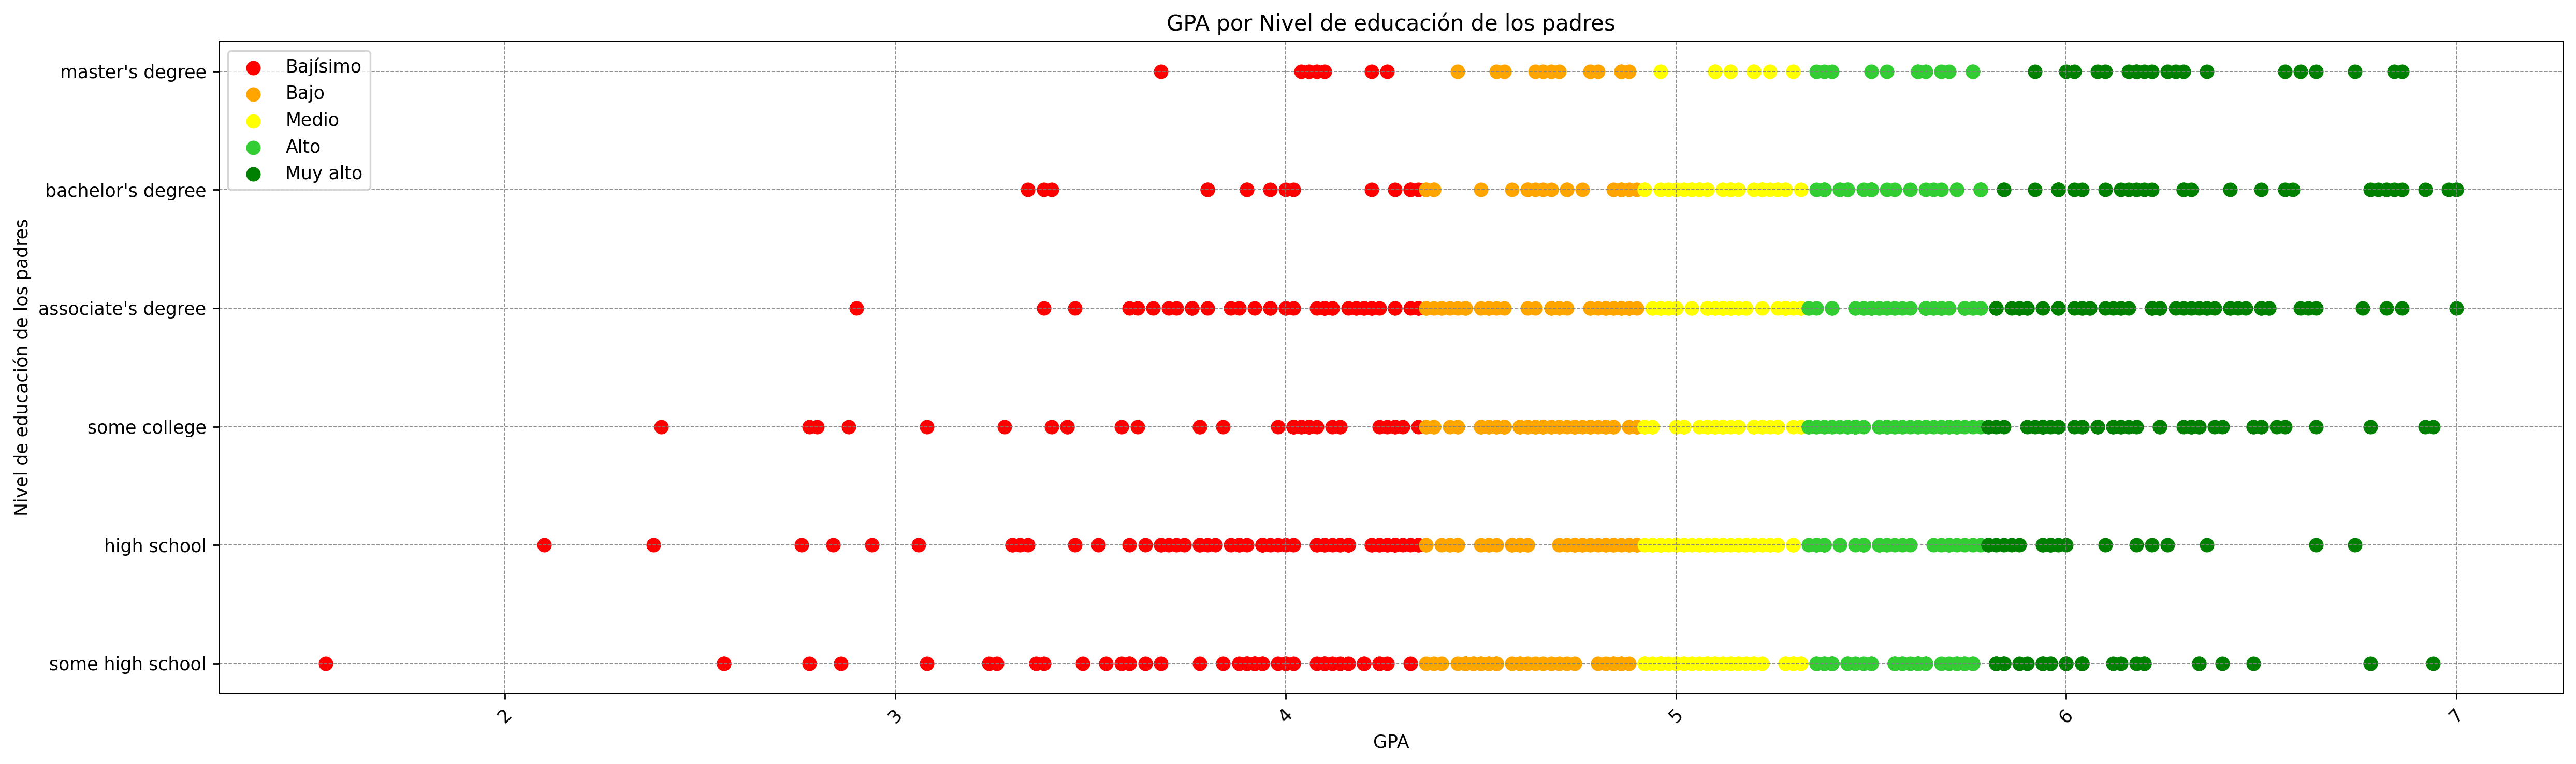

In [59]:
#Usando plt scatter

color_mapping = {
    'Bajísimo': 'red',
    'Bajo': 'orange',
    'Medio': 'yellow',
    'Alto': 'limegreen',
    'Muy alto': 'green'
}
clean_df_scale2['GPA cuantiles colors'] = clean_df_scale2['GPA cuantiles'].map(color_mapping)

fig, ax = plt.subplots(figsize=(20, 6), dpi=250)

clean_df_scale2 = clean_df_scale2.sort_values(by="GPA")

# Crear el gráfico de dispersión y agregar automáticamente etiquetas y colores
for category, color in color_mapping.items():
    subset = clean_df_scale2[clean_df_scale2["GPA cuantiles"] == category]
    scatter = ax.scatter(
        subset["GPA"],
        subset["parental level of education"],
        c=color,
        s=50,
        label=category,  # Usar la categoría como etiqueta de la leyenda
    )

# Configurar los ejes y el título
ax.set_xlabel("GPA")
ax.set_ylabel("Nivel de educación de los padres")
ax.set_title("GPA por Nivel de educación de los padres")
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
# Mostrar la leyenda con todas las categorías automáticamente
legend = ax.legend(loc='best')

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [33]:
# Código de gráfico 
fig = px.scatter(
    clean_df_scale2.sort_values(by="GPA"),
    x="GPA",
    y="parental level of education",
    hover_data=["gender"],
    color="GPA cuantiles",
    title="GPA por Nivel de educación de los padres",
    color_discrete_sequence=["tomato", "orange", "yellow", "greenyellow", "green"]
)

fig

c:\Users\Legers\MDS7202\env_lab\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



```
De reojo solo se puede ver que los que tienen padres con un grado de master tienen un GPA minimo mayor al resto, tambien que sus promedios del primer quintil no estan tan sesgados como el resto. Sin embargo respecto al segundo, tercer y cuarto quintil tienen un sesgo bastante similar por lo que no hay alguna diferencia significativa de los GPA's de los hijos respecto al grado de sus padres, a diferencia de los que tienen padres con un grado some high school en donde se puede ver que el ultimo quintil se concentra entre [5.82 y 6.48], a diferencia del resto cuyo ultimo quintil se extiende hasta aproximadamente el promedio maximo.

Ahora bien, algo importante a considerar es que las muestras estan desbalanceadas y puede que no sean significativas, dando por efecto que esta visualizacion no sea tan determinista. Por ejemplo, para el grado de master se tienen solo 48 ejemplos, mientras que para el grado some high school se tienen 196, por lo que podria perfectamente ocurrir que si se agregan 150 datos nuevos de padres con un grado master, la distribucion de promedio de sus hijos se asemeje a la de los con padres con grado some high school o a cualquier otra. De igual forma, no es posible concluir sobre las tendencias de estos datos ya que nada afirma que estas muestras sean representativas.
 
```

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://gifdb.com/images/high/orange-cat-cat-walking-with-two-legs-xlgf7qx4i24da74f.gif" width="400">
</p>


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>